In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import random
random.seed(0)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

plt.ioff()
pd.set_option('display.max_columns', None)

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [4]:
data_frame = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data_frame['y'] = diabetes.target

In [5]:
data_frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
X = np.array(data_frame.drop('y', axis=1))
y = np.array(data_frame['y'])

In [7]:
positive_indexes = data_frame['y'] > np.mean(data_frame['y'])
negative_indexes = data_frame['y'] <= np.mean(data_frame['y'])

In [8]:
def cluster_and_plot(data_frame, indexes, K=3, show_plot=True):
    X = np.array(data_frame.drop('y', axis=1))
    X_select = np.array(data_frame[['age', 'bp', 's1']])[indexes,:]
    y = np.array(data_frame['y'])[indexes]
    y = [1 if yy > np.mean(data_frame['y']) else 0 for yy in y]
    kmeans_model = KMeans(n_clusters=K, random_state=1)
    y_pred = kmeans_model.fit_predict(X_select)
    variance_explained = kmeans_model.score(X_select)
    print("Variance Explained:", variance_explained)
    if show_plot:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_select[:, 0], X_select[:, 1], X_select[:, 2], c=y_pred, s=20)
        plt.title("Patient Clusters, K={}".format(K))
        ax.set_xlabel('Age')
        ax.set_ylabel('BP')
        ax.set_zlabel('S1')
        plt.show()
    return variance_explained

('Variance Explained:', -0.49696807902941065)


<IPython.core.display.Javascript object>


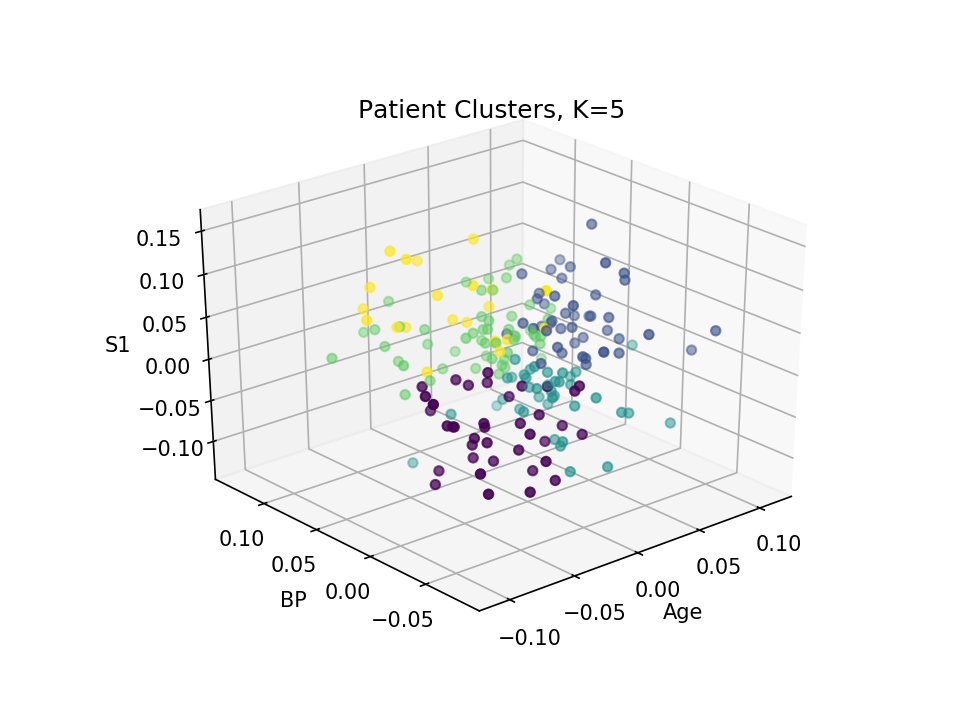

-0.49696807902941065

In [9]:
# Cluster Patients that had Diabetes Progression
cluster_and_plot(data_frame, positive_indexes, K=5)

('Variance Explained:', -0.53471148889901898)


<IPython.core.display.Javascript object>


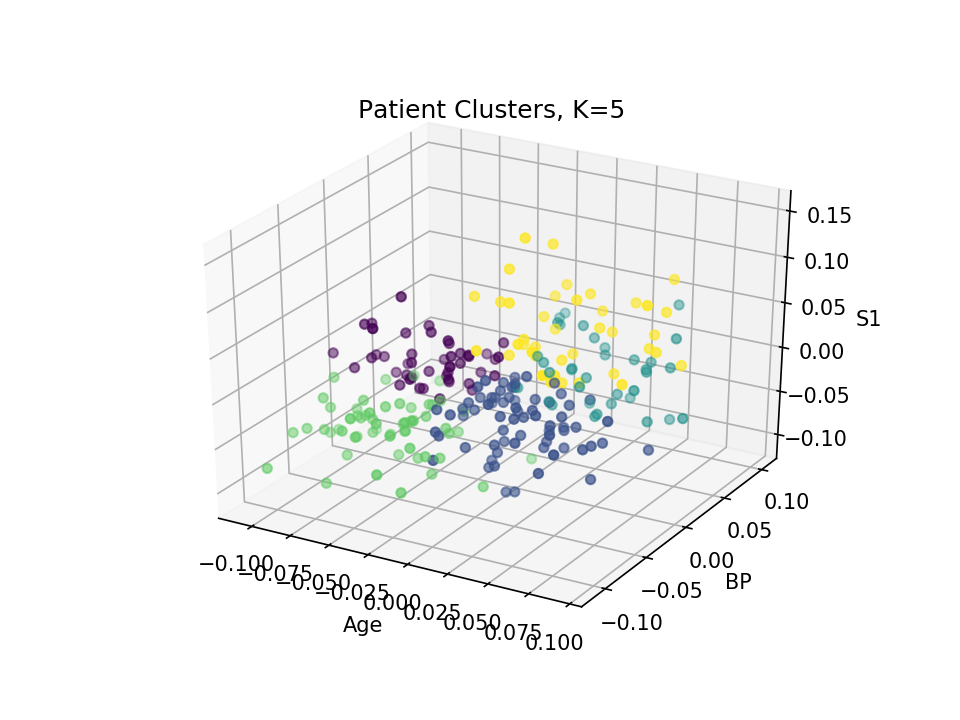

-0.53471148889901898

In [10]:
# Cluster Patients that didn't have Diabetes Progression
cluster_and_plot(data_frame, negative_indexes, K=5)

('Variance Explained:', -0.68661123528318757)
('Variance Explained:', -0.57971449280025134)
('Variance Explained:', -0.49696807902941065)
('Variance Explained:', -0.42799269742038493)
('Variance Explained:', -0.39203770040823988)
('Variance Explained:', -0.35076809376931739)
('Variance Explained:', -0.32066173176168128)
('Variance Explained:', -0.29516048213889667)
('Variance Explained:', -0.2765779699449169)
('Variance Explained:', -0.26256312938941673)
('Variance Explained:', -0.24306489253646674)
('Variance Explained:', -0.23382048361226965)
('Variance Explained:', -0.22337315302174254)
('Variance Explained:', -0.20720586757791229)
('Variance Explained:', -0.20079693729179465)
('Variance Explained:', -0.1938107752083795)
('Variance Explained:', -0.18399601396925067)
('Variance Explained:', -0.17649448888163138)
('Variance Explained:', -0.16701982228988793)
('Variance Explained:', -0.16151852272432193)
('Variance Explained:', -0.15398445787895448)
('Variance Explained:', -0.143497219

<IPython.core.display.Javascript object>


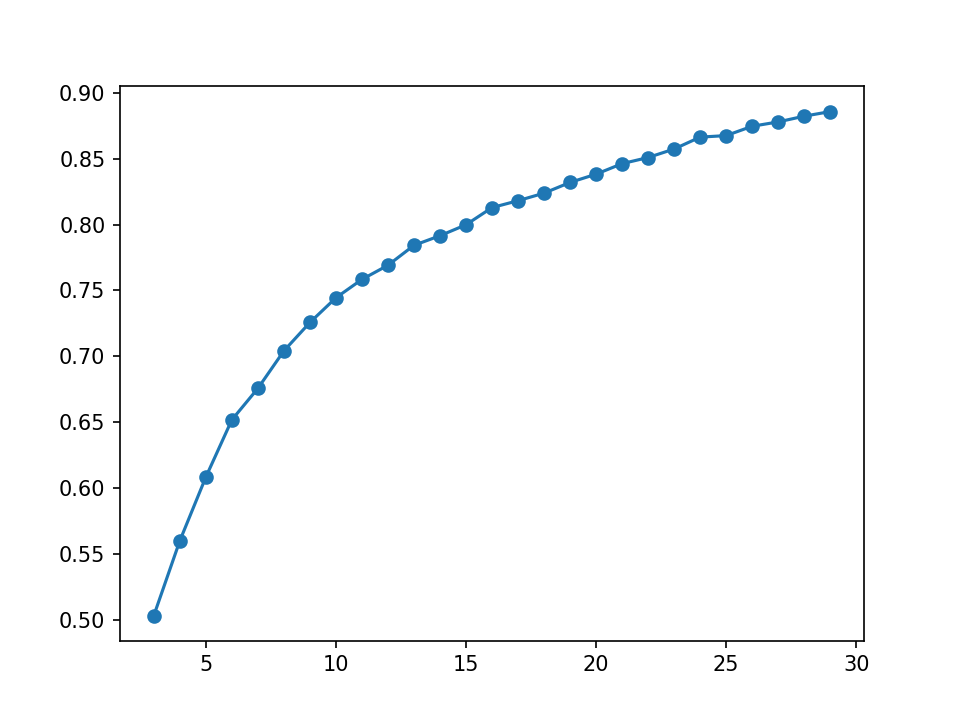

In [11]:
def elbow_method():
    explained_variances = []
    Ks = list(range(3, 30))
    for K in Ks:
        explained_variance = cluster_and_plot(data_frame, positive_indexes, K=K, show_plot=False)
        explained_variances.append(explained_variance)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(Ks, np.exp(explained_variances), marker='o')
    plt.show()
    
elbow_method()

('Variance Explained:', -0.39547445048065288)


<IPython.core.display.Javascript object>


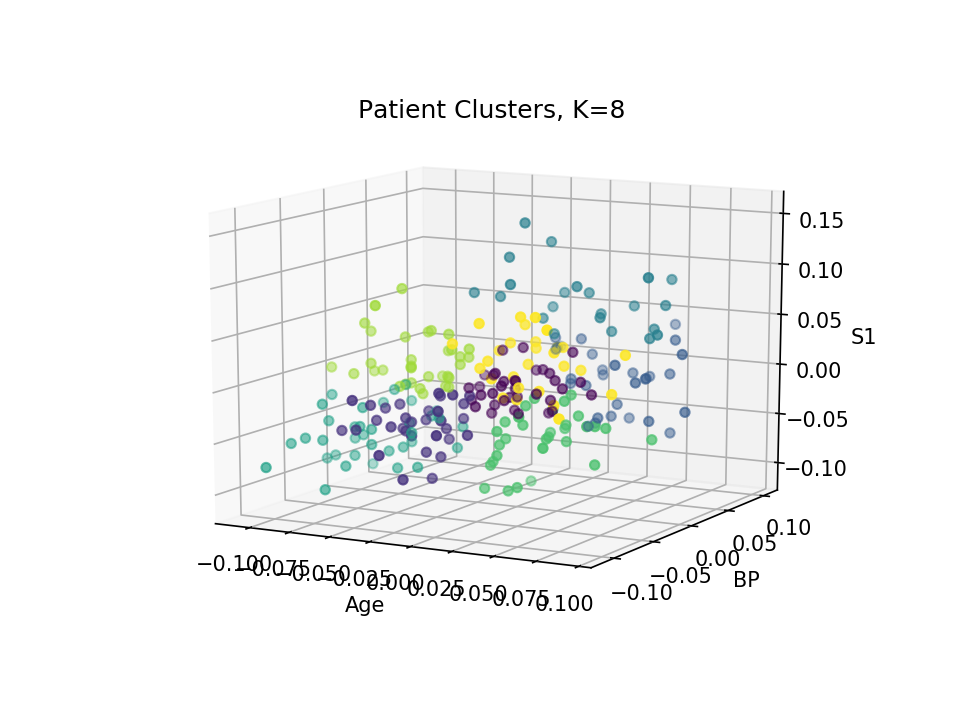

-0.39547445048065288

In [12]:
cluster_and_plot(data_frame, negative_indexes, K=8)

('Unsupervised Accuracy', 0.67873303167420818)
Confusion Matrix
[[160  55]
 [ 87 140]]
('Average Precision', 0.63962033474860625)


<IPython.core.display.Javascript object>


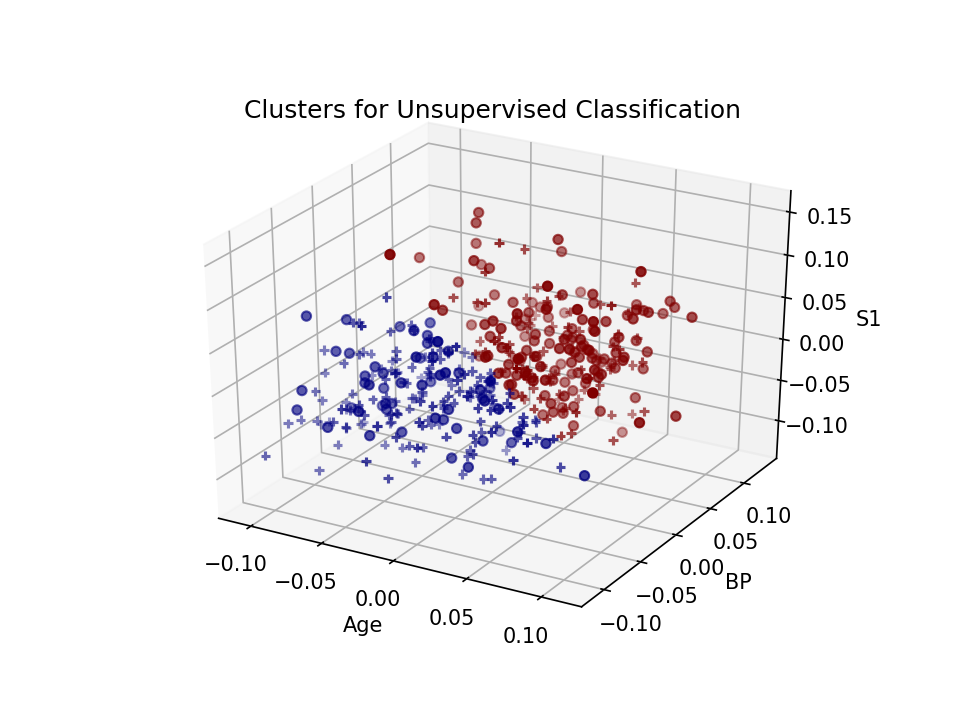

In [13]:
def unsupervised_classification(data_frame, indexes):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X = np.array(data_frame.drop('y', axis=1))
    X_select = np.array(data_frame[['age', 'bp', 's1']])
    y = np.array(data_frame['y'])
    y = [1 if yy > np.mean(data_frame['y']) else 0 for yy in y]
    y_pred = KMeans(n_clusters=2, random_state=1).fit_predict(X_select)
    ax.scatter(X_select[positive_indexes, 0], X_select[positive_indexes, 1], X_select[positive_indexes, 2], c=y_pred[positive_indexes], s=20, marker='o', cmap='jet')
    ax.scatter(X_select[negative_indexes, 0], X_select[negative_indexes, 1], X_select[negative_indexes, 2], c=y_pred[negative_indexes], s=20, marker='+', cmap='jet')
    
    plt.title("Clusters for Unsupervised Classification")
    ax.set_xlabel('Age')
    ax.set_ylabel('BP')
    ax.set_zlabel('S1')
    accuracy = accuracy_score(y_pred, y)
    print("Unsupervised Accuracy", accuracy)
    if accuracy < 0.5:
        y_pred = [0 if yy == 1 else 1 for yy in y_pred]
        accuracy = accuracy_score(y_pred, y)
        print("Unsupervised Accuracy Fixed", accuracy)
    print("Confusion Matrix")
    print(confusion_matrix(y_pred, y))
    print("Average Precision", average_precision_score(y_pred, y))
    plt.show()

unsupervised_classification(data_frame, range(len(data_frame)))